In [1]:
from pathlib import Path
from ast import literal_eval

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

import utils

In [2]:
df = utils.load_cop_data()
song_numbers = utils.load_song_numbers()
participant_numbers = utils.load_participant_numbers()
song_labels = utils.load_song_labels_for_figures()

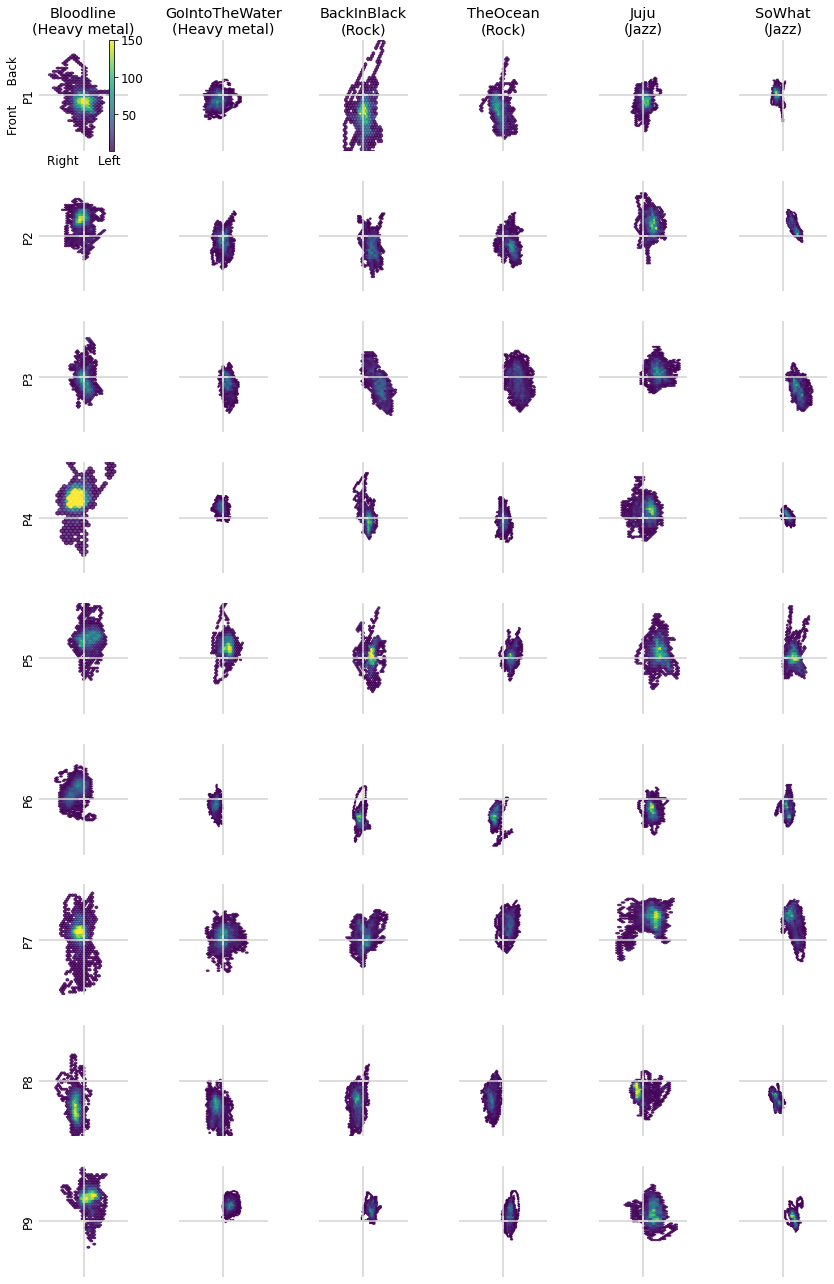

In [6]:
matplotlib.rcParams.update({'font.size':12})
fig, axs = plt.subplots(len(participant_numbers), len(song_numbers), figsize=(12, 18))
cmap='viridis'

for ind, row in df.iterrows():
        # visualize
    i_song = song_numbers[row["song"]]
    i_ptp = row["participant"] - 1
    hb = axs[i_ptp, i_song].hexbin(x=row["cop_y"],
                              y=row["cop_x"],
                              cmap=cmap,
                              gridsize=(15,25),
                              mincnt=1,
#                               bins='log',
                              alpha=.8,
                              vmax=150
#                                   edgecolors="none"
                             )
    if i_song == 0:
#         ptp_number = 9 - i_ptp
        axs[i_ptp, i_song].set_ylabel("P%d"%row["participant"])
        if i_ptp == 0:
            axs[i_ptp, i_song].set(xlabel="Right     Left", ylabel="Front     Back\nP%d"%row["participant"])
            plt.colorbar(hb, ax=axs[i_ptp, i_song])
    if i_ptp == 0:
        axs[i_ptp, i_song].set_title(song_labels[i_song])
    sns.despine(fig=fig, ax=axs[i_ptp, i_song], top=True, right=True, left=True, bottom=True)
    axs[i_ptp, i_song].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    axs[i_ptp, i_song].set(xlim=(-.4, .4), ylim=(-.5, .5))
    axs[i_ptp, i_song].legend([],[], frameon=False)
    axs[i_ptp, i_song].set_aspect('equal', adjustable='box')
    axs[i_ptp, i_song].axhline(0, c='lightgrey')
    axs[i_ptp, i_song].axvline(0, c='lightgrey')
    axs[i_ptp, i_song].scatter([0], [0], c='w', marker='+', s=100)
    cb = plt.colorbar(hb, ax=axs[i_ptp, i_song])
    cb.remove() 
plt.tight_layout()
fig.savefig(utils.get_figures_folder() / "fig5_raw-center-of-pressure.png")